In [438]:
import pandas as pd
import collections
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px
import calendar

In [2]:
df = pd.read_csv(r'./P6-UK-Bank-Customers.csv')

In [3]:
df.head(3)

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83


In [5]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'], format="%d.%b.%y")
df['Month'] = df['Date Joined'].apply(lambda z: int(z.month))

In [6]:
print(df.describe())
print(df['Job Classification'].unique())

        Customer ID          Age        Balance        Month
count  4.014000e+03  4014.000000    4014.000000  4014.000000
mean   1.696831e+08    38.611111   39766.448274     8.371948
std    8.865374e+07     9.819121   29859.489192     2.683471
min    1.000000e+08    15.000000      11.520000     1.000000
25%    1.000020e+08    31.000000   16115.367500     6.000000
50%    1.000038e+08    37.000000   33567.330000     9.000000
75%    2.000031e+08    45.000000   57533.930000    11.000000
max    4.000038e+08    64.000000  183467.700000    12.000000
['White Collar' 'Blue Collar' 'Other']


In [366]:
AG = []
for i in range(len(df)):
    if df.loc[i, 'Age'] >= 15 and df.loc[i, 'Age'] <= 22:
        AG.append('15-22')
    elif df.loc[i, 'Age'] >= 23 and df.loc[i, 'Age'] <= 30:
        AG.append('23-30')
    elif df.loc[i, 'Age'] >= 31 and df.loc[i, 'Age'] <= 40:
        AG.append('31-40')
    elif df.loc[i, 'Age'] >= 41 and df.loc[i, 'Age'] <= 50:
        AG.append('41-50')
    elif df.loc[i, 'Age'] >= 51 and df.loc[i, 'Age'] <= 55:
        AG.append('51-55')
    else:
        AG.append('56-64')
df['Age_Group'] = AG

In [388]:
fig = sp.make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]], row_heights=[300])
fig.add_trace(go.Pie(values=list(df['Gender'].value_counts().values), 
                     labels=list(df['Gender'].value_counts().index),
                     domain=dict(x=[0, 0.5]),name="Gender"), row=1, col=1)
fig.add_trace(go.Pie(values=list(df['Job Classification'].value_counts().values), 
                     labels=list(df['Job Classification'].value_counts().index),
                     domain=dict(x=[0, 0.5]),name="Job Classification"), row=1, col=2)
fig.add_trace(go.Pie(values=list(df['Region'].value_counts().values), 
                     labels=list(df['Region'].value_counts().index),
                     domain=dict(x=[0, 0.5]),name="Region"), row=1, col=3)
fig.show()

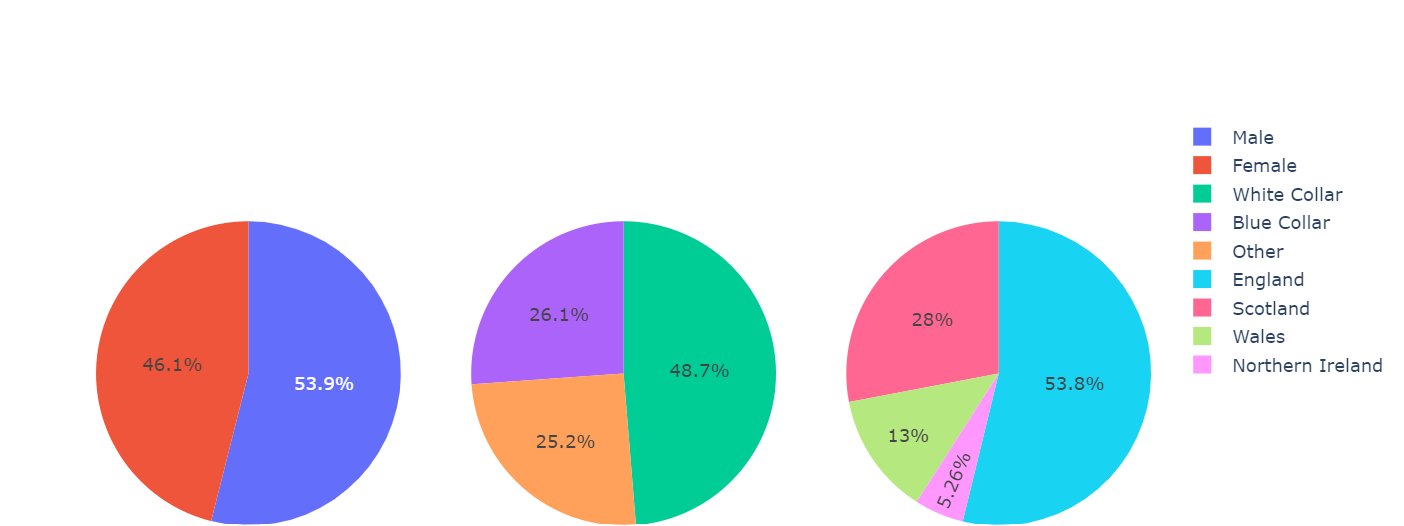
The data is evenly splitly in terms of gender, but not in job classification and region. 
Most of the new accounts are opened in England, which makes sense as London is a global financial hub. 
Also, mosot of the account users are white collar. 

In [480]:
fig = sp.make_subplots(rows=4, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {}] for i in range(4)], 
                       subplot_titles=(" ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " ", " "))
count = 1
Region=[]
show = True
for k, dfr in df.groupby(['Region']):
    fig.add_trace(go.Pie(values=list(dfr['Gender'].value_counts().values), 
                         labels=list(dfr['Gender'].value_counts().index),
                         domain=dict(x=[0, 0.5]),name="Gender"), row=count, col=1)
    fig.add_trace(go.Pie(values=list(dfr['Job Classification'].value_counts().values), 
                         labels=list(dfr['Job Classification'].value_counts().index),
                         domain=dict(x=[0, 0.5]),name="Job Classification"), row=count, col=2)
    if count > 1: show = False 
    my = list(dfr[dfr['Gender']=='Male']['Age_Group'].value_counts().sort_index().index)
    mx = list(dfr[dfr['Gender']=='Male']['Age_Group'].value_counts().sort_index().values)
    
    fy= list(dfr[dfr['Gender']=='Female']['Age_Group'].value_counts().sort_index().index)
    fx= list(dfr[dfr['Gender']=='Female']['Age_Group'].value_counts().sort_index().values*-1)
    fig.add_trace(go.Bar(y= my, x = mx, marker = {'color':'red'}, name = 'Male',
                         orientation = 'h', showlegend=show,  width=1),row=count, col=3)   
    fig.add_trace(go.Bar(y= fy, x = fx, marker = {'color':'blue'}, name = 'Female'
                         , showlegend=show, orientation = 'h', width=1),row=count, col=3)

    count+=1
    Region.append(k)
for i in range(4):
    fig.layout.annotations[i*3].update(text=Region[i])
    fig.update_xaxes(tickvals = [-1000, -500, -250, 0, 250, 500, 1000], 
                 ticktext=[1000, 500, 250, 0, 250, 500, 1000], row=i+1, col=i*0+3)

fig.layout.update({'height':1000})
fig.show()

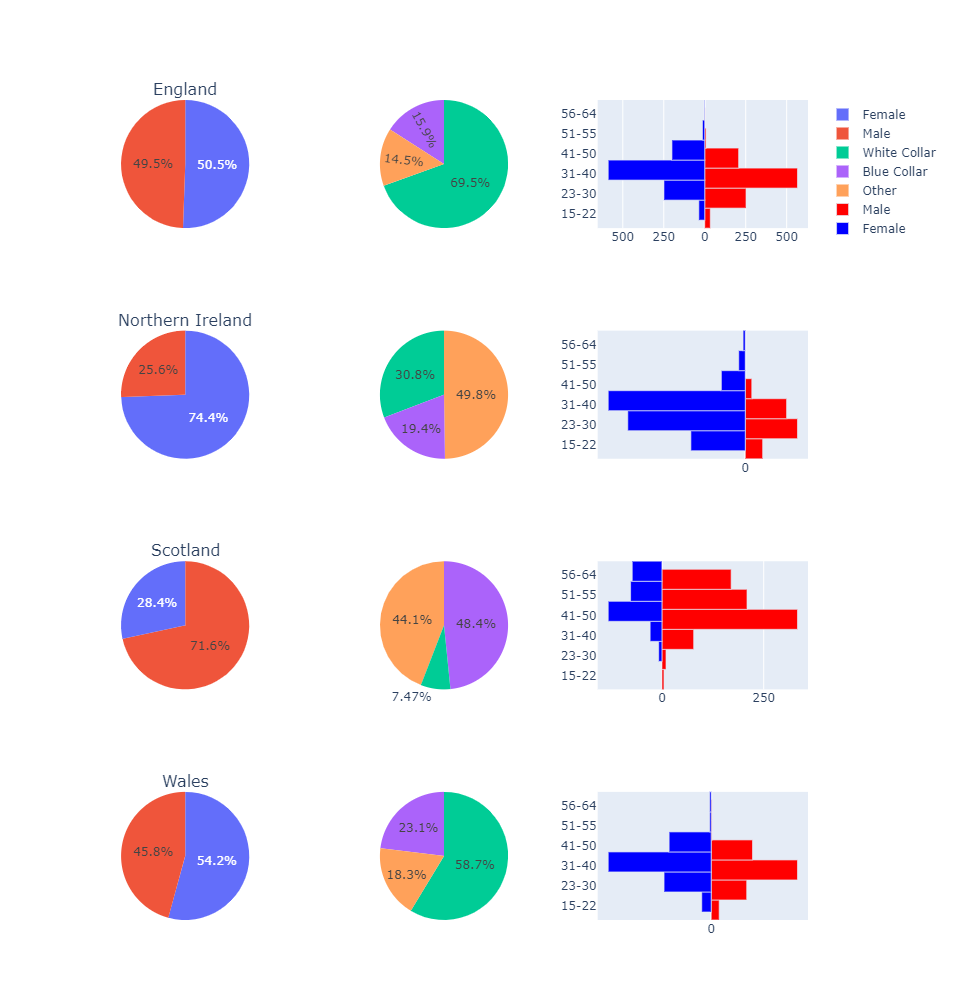
This plot shows the business nature in Scotland is a bit different from the rest of the UK.New account users are mostly male, and majority of them are in the older age group range. Also, higher proportion of new account users are blue collar workers relative to the rest of the UK.  

In [484]:
monthly_balance = pd.DataFrame(df.groupby(['Month', 'Region']).median().reset_index())
fig = px.line(monthly_balance, x= 'Month', y = 'Balance', facet_col='Region')
fig.layout.update({'width':990})
fig.update_xaxes(tickvals = [i for i in range(1,13)], ticktext=list(calendar.month_name)[1:])
fig.show()
df['Count'] = ''
monthly_acct = pd.DataFrame(df.groupby(['Month', 'Region']).agg({'Count': 'count'}).reset_index())
monthly_acct.head(5)

fig = px.line(monthly_acct, x= 'Month', y = 'Count', facet_col='Region')
fig.update_xaxes(tickvals = [i for i in range(1,13)], ticktext=list(calendar.month_name)[1:])
fig.show()

In [482]:
monthly_acct_age = pd.DataFrame(df.groupby(['Month', 'Age_Group']).agg({'Count':'count'}).reset_index())
monthly_acct_age_balance = pd.DataFrame(df.groupby(['Month', 'Age_Group', 'Balance']).median().reset_index())
fig = sp.make_subplots(rows=1, cols=2, specs=[[{"type": "scatter"}, {"type": "scatter"}]], row_heights=[300])
fig.add_trace(go.Scatter(x=monthly_acct_age['Month'], y=monthly_acct_age['Age_Group'], mode = 'markers', 
                         marker_size=monthly_acct_age['Count']/monthly_acct_age['Count'].max()*50,
                         hovertext = monthly_acct_age['Count'], hovertemplate = '%{hovertext}',
                         name='Num. of New Acct.'), row=1, col=1)
fig.add_trace(go.Scatter(x=monthly_acct_age_balance['Month'], y=monthly_acct_age_balance['Age_Group'], mode = 'markers', 
                         marker_size=monthly_acct_age_balance['Balance']/monthly_acct_age_balance['Balance'].max()*30,
                         hovertext = round(monthly_acct_age_balance['Balance']/1000,0), hovertemplate = '%{hovertext}k', name='Median Balance'), row=1, col=2)
fig.update_xaxes(tickvals = [i for i in range(1,13)], ticktext=list(calendar.month_name)[1:])
fig.update_yaxes(title='Age Group', row=1, col=1)
fig.update_annotations({'hovertext': monthly_acct_age_balance['Balance'],
                       'hovertemplate':'%{hovertext}'})
fig.layout.update({'width':1200})
fig.show()

C:\Users\Penelope\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



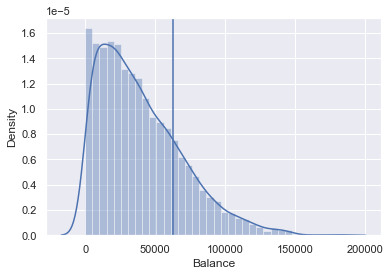

In [166]:
sns.distplot(df['Balance'])
plt.axvline(62885, 0,1.6)

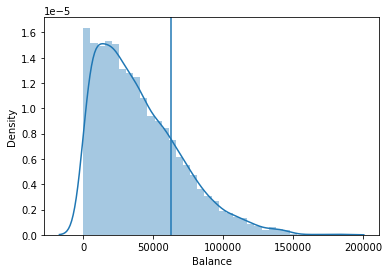
The balance is heavily left skewed as expected. 

In [384]:
df1 = df.copy()
df1.drop('Customer ID', axis = 1, inplace=True)
df1.head(3)

,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance,Month,Age_Group
0,Simon,Walsh,Male,21,England,White Collar,2015-01-05,113810.15,1,15-22
1,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,2015-01-06,36919.73,1,31-40
2,Liam,Brown,Male,46,England,White Collar,2015-01-07,101536.83,1,41-50


In [385]:
df1 = pd.get_dummies(df1, columns=['Job Classification', 'Region', 'Gender'])
df1.head(3)

,Name,Surname,Age,Date Joined,Balance,Month,Age_Group,Job Classification_Blue Collar,Job Classification_Other,Job Classification_White Collar,Region_England,Region_Northern Ireland,Region_Scotland,Region_Wales,Gender_Female,Gender_Male
0,Simon,Walsh,21,2015-01-05,113810.15,1,15-22,0,0,1,1,0,0,0,0,1
1,Jasmine,Miller,34,2015-01-06,36919.73,1,31-40,1,0,0,0,1,0,0,1,0
2,Liam,Brown,46,2015-01-07,101536.83,1,41-50,0,0,1,1,0,0,0,0,1


<AxesSubplot:>

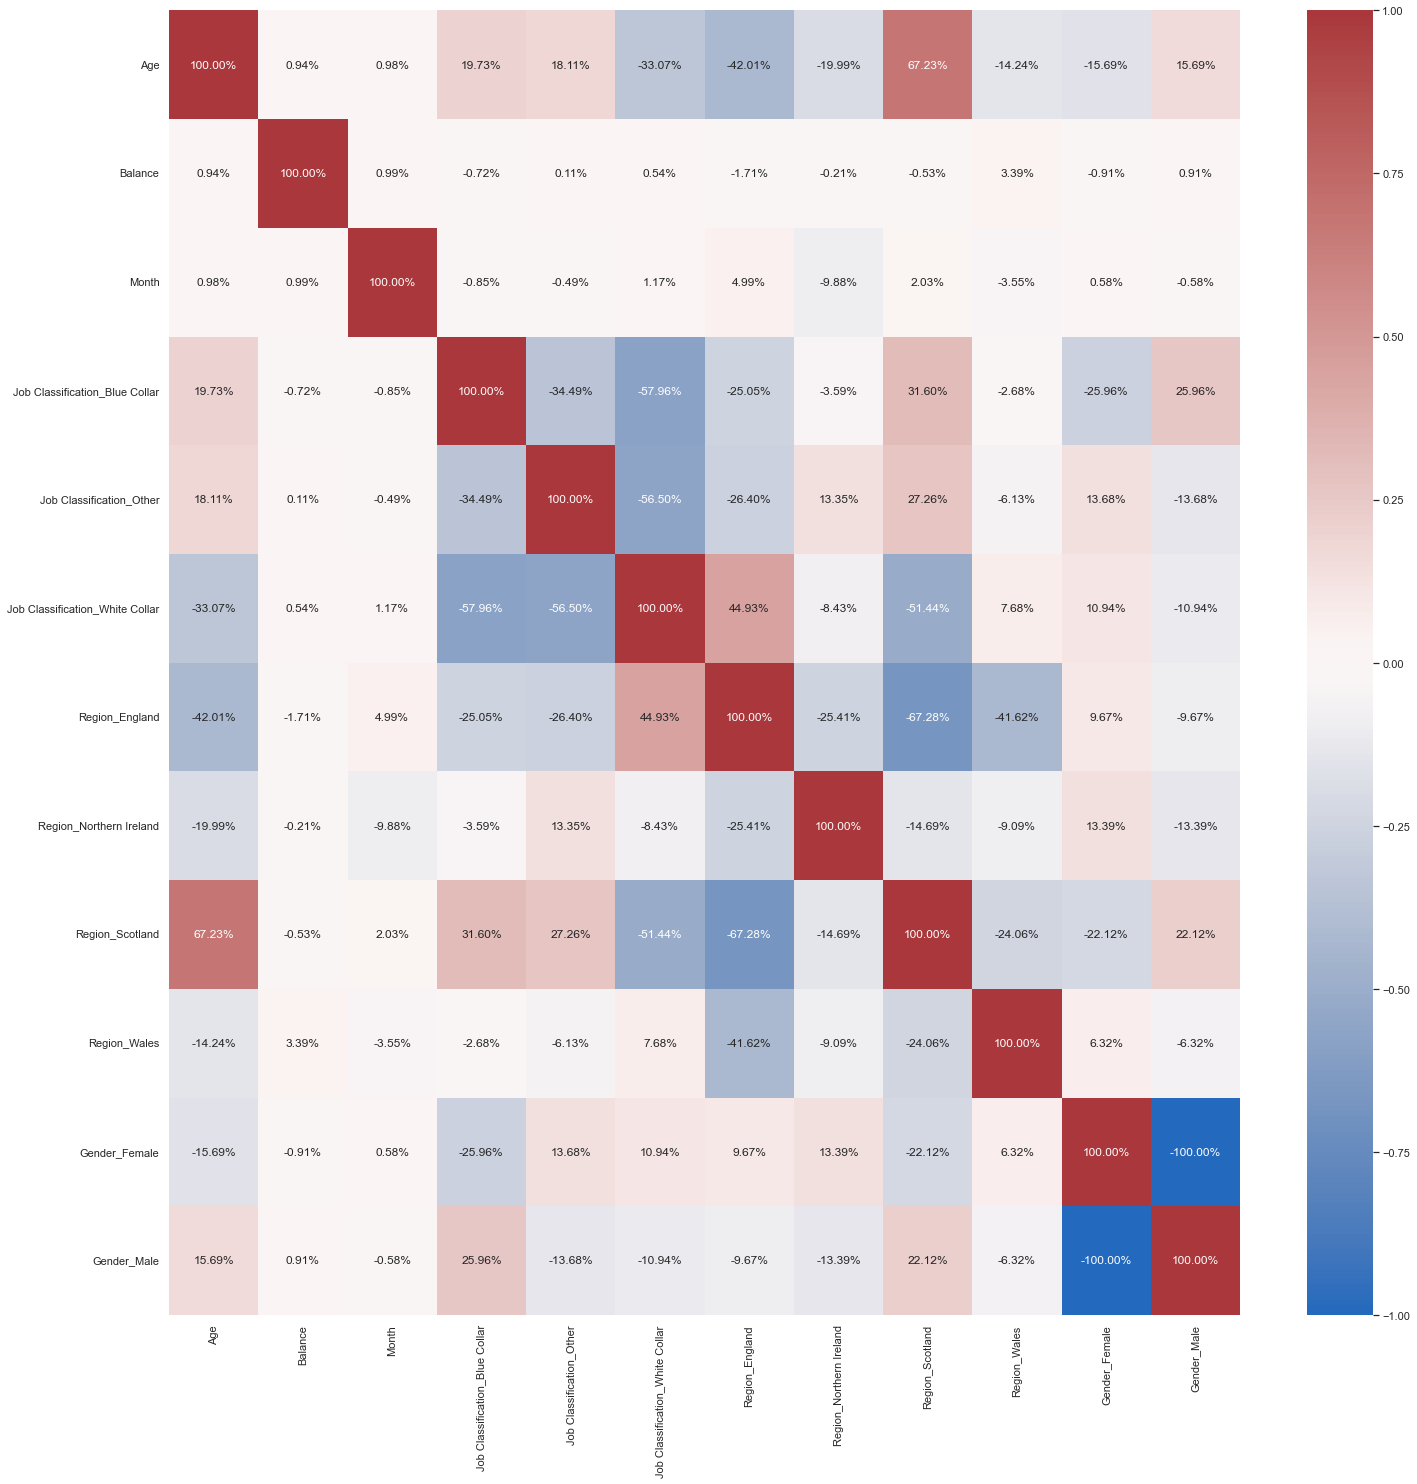

In [386]:
fig, ax = plt.subplots(figsize=(24,24))
colormap = sns.color_palette("vlag", as_cmap=True)
sns.heatmap(df1.corr(), cmap=colormap, annot=True, fmt=".2%")

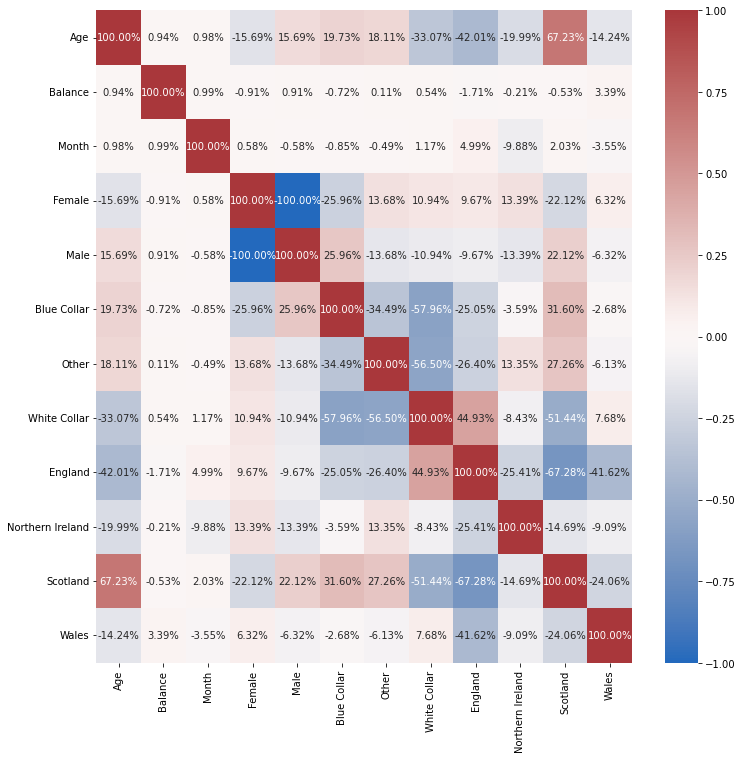 
Looking at the correlations between Balance and other variables, can't there are not really mych to tell 
Indeed, the plot suggests there is some sort of correlation between White Collar and England, which is self-explantory

In [164]:

fig = px.density_contour(df[(df['Job Classification']=='White Collar')], x="Age", y="Balance", facet_col="Gender", marginal_x="histogram", marginal_y="histogram")
fig.data[0]["contours"].coloring = "fill"
fig.data[0]["coloraxis"]="coloraxis1"
fig.data[2]["contours"].coloring = "fill"
fig.data[2]["coloraxis"]="coloraxis1"
fig.show()

fig = px.density_contour(df[(df['Job Classification']=='Blue Collar')], x="Age", y="Balance", facet_col="Gender", marginal_x="histogram", marginal_y="histogram")
fig.data[0]["contours"].coloring = "fill"
fig.data[0]["coloraxis"]="coloraxis1"
fig.data[2]["contours"].coloring = "fill"
fig.data[2]["coloraxis"]="coloraxis1"
fig.show()

fig = px.density_contour(df[(df['Job Classification']=='Other')], x="Age", y="Balance", facet_col="Gender", marginal_x="histogram", marginal_y="histogram")
fig.data[0]["contours"].coloring = "fill"
fig.data[0]["coloraxis"]="coloraxis1"
fig.data[2]["contours"].coloring = "fill"
fig.data[2]["coloraxis"]="coloraxis1"
fig.show()